          X_0       X_1
0    5.144919 -0.558154
1    8.764872 -2.157733
2    7.632587 -1.250294
3    9.305811  1.422345
4    6.221340 -1.761959
..        ...       ...
95  11.301300  4.052179
96  10.038587 -2.066808
97   5.002774 -3.939068
98  12.864215  0.459032
99   9.722405 -0.188144

[100 rows x 2 columns]
[9 0]
prior data mean: ( 15 , -4 )
true mean: ( 9.472401754230292 , -0.13731778067970687 )


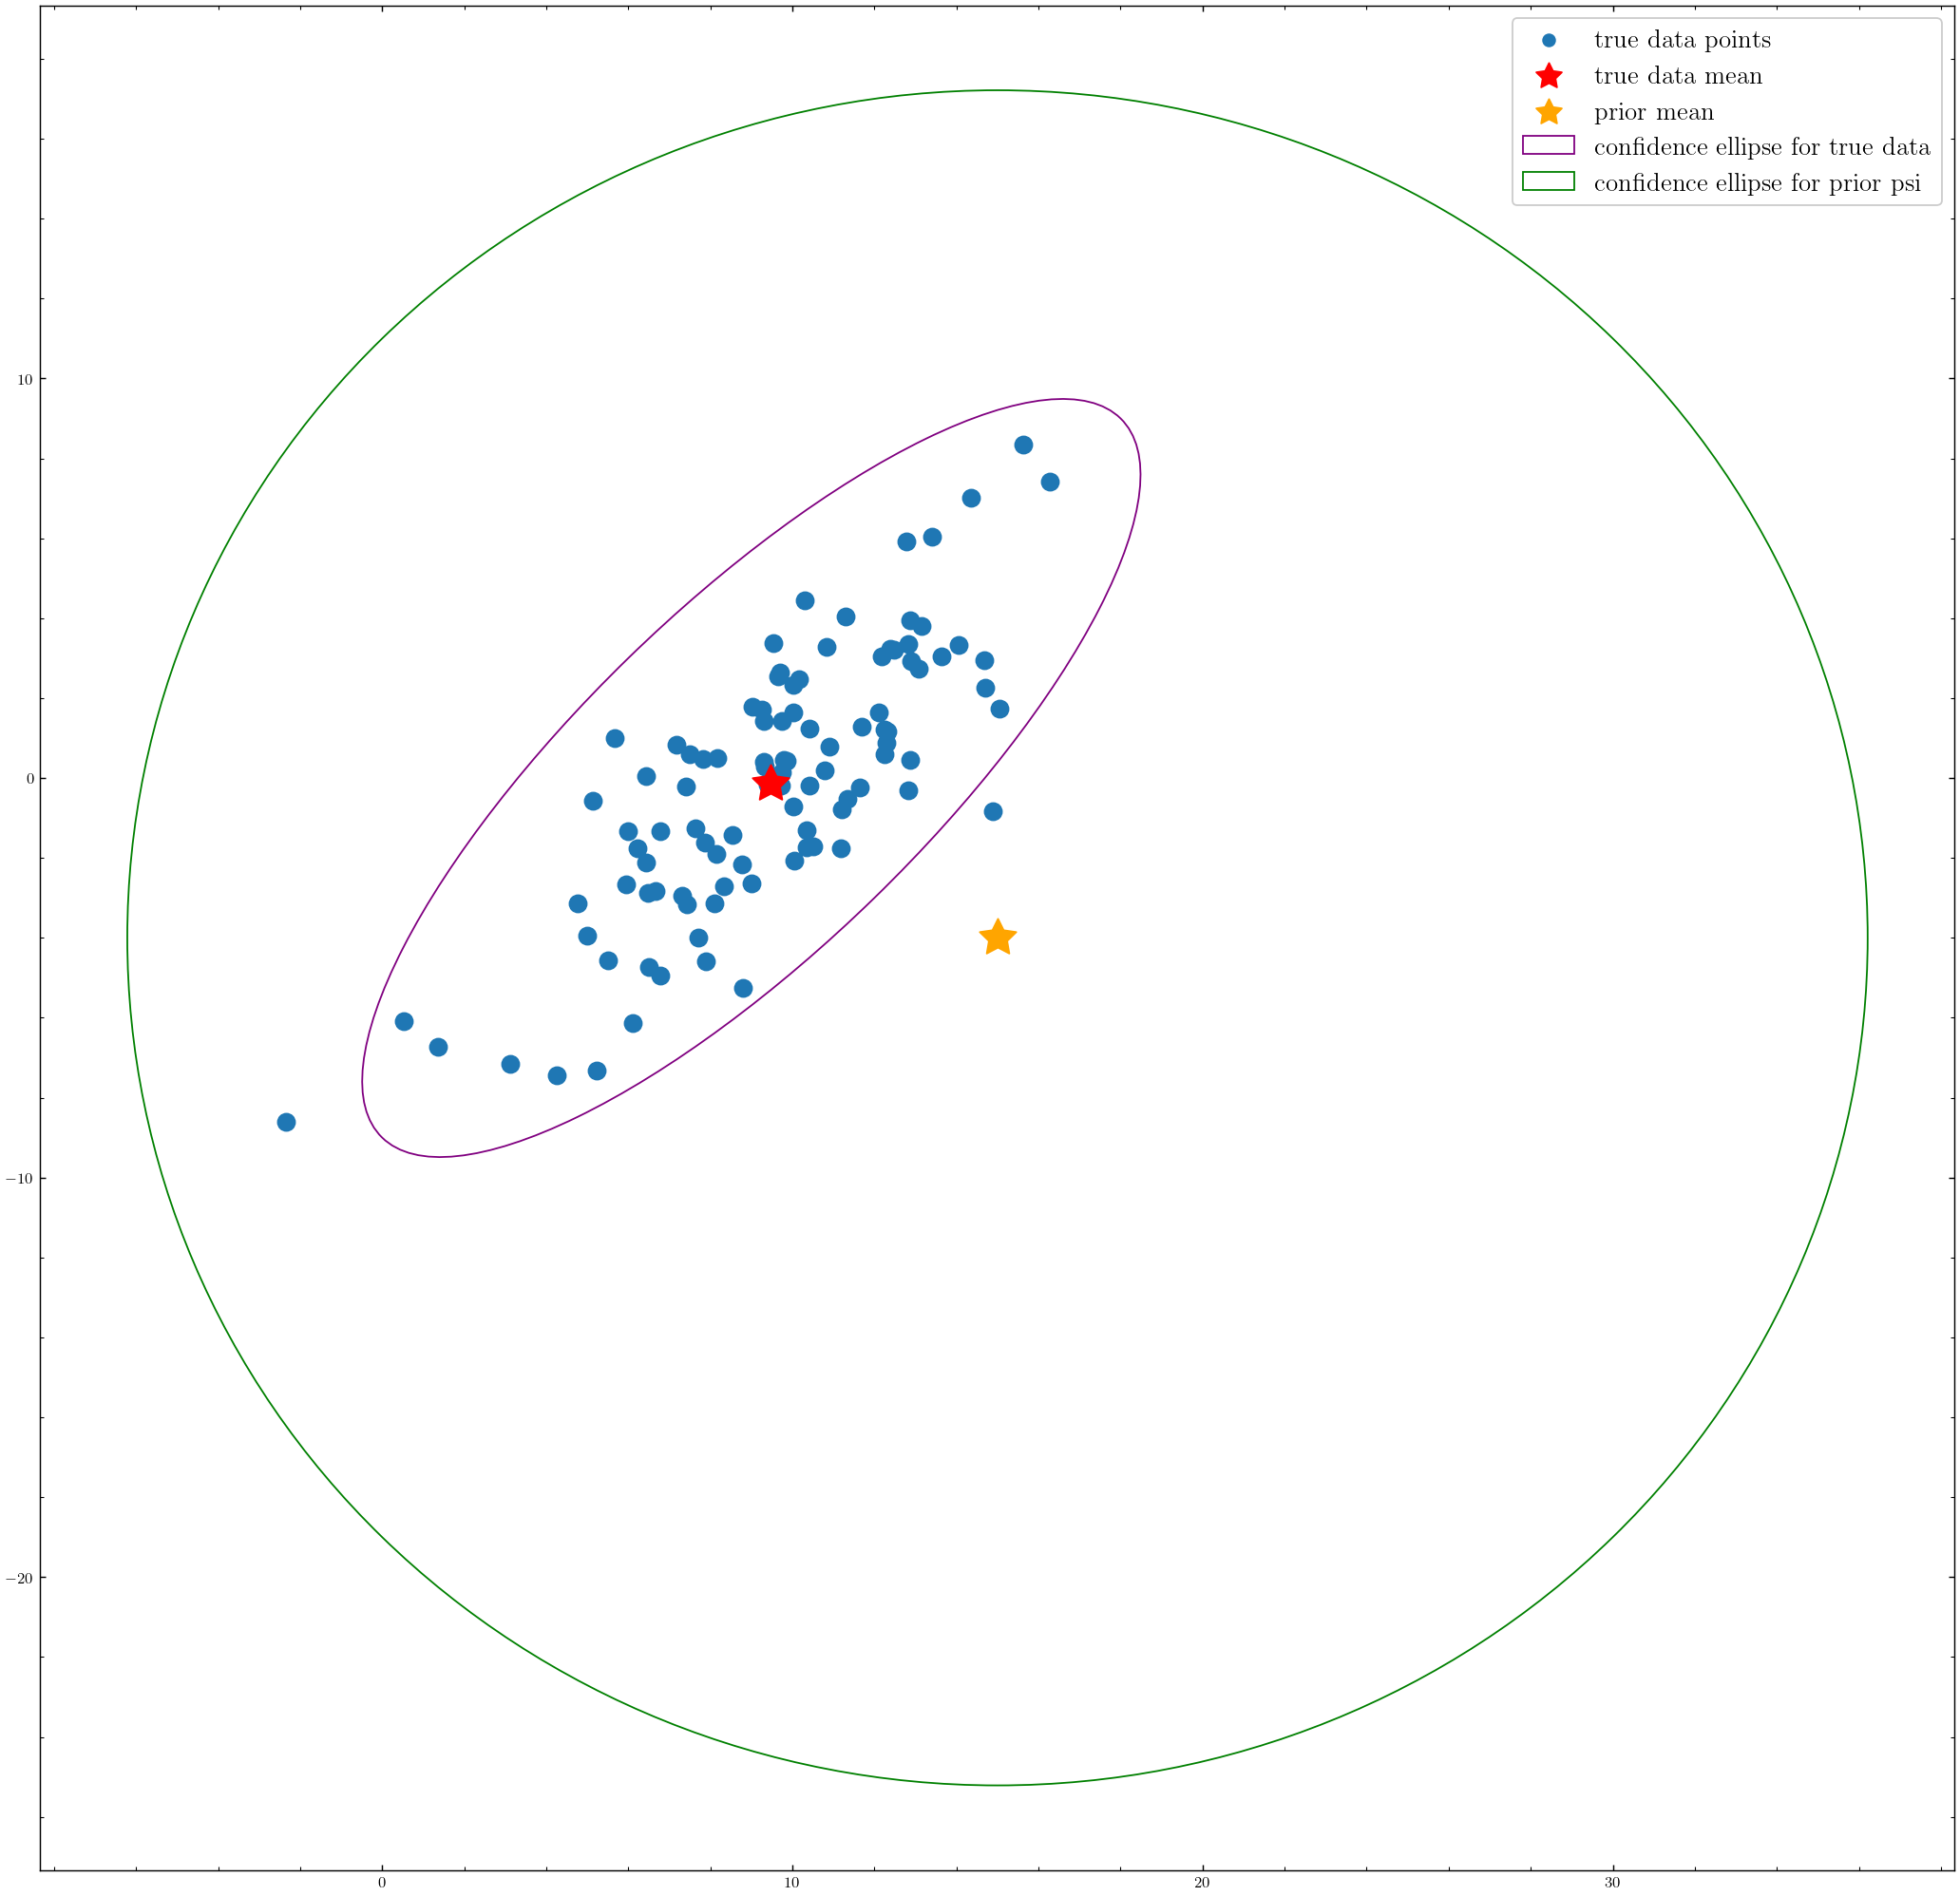

{'sum_squares': array([1083.47514033, 1099.26832454]), 'mu_n': array([ 9.52713045, -0.17556216]), 'kappa_n': 101, 'nu_n': 104, 'psi_n': array([[1163.72696446, 1078.12836864],
       [1062.33518443, 1164.04091259]])}
[[11.46659116 10.4781359 ]
 [10.4781359  11.4969475 ]]
prior data mean: ( 15 , -4 )
true mean: ( 9.472401754230292 , -0.13731778067970687 )
posterior mean: ( 9.537089750349754 , -0.16624308803705073 )


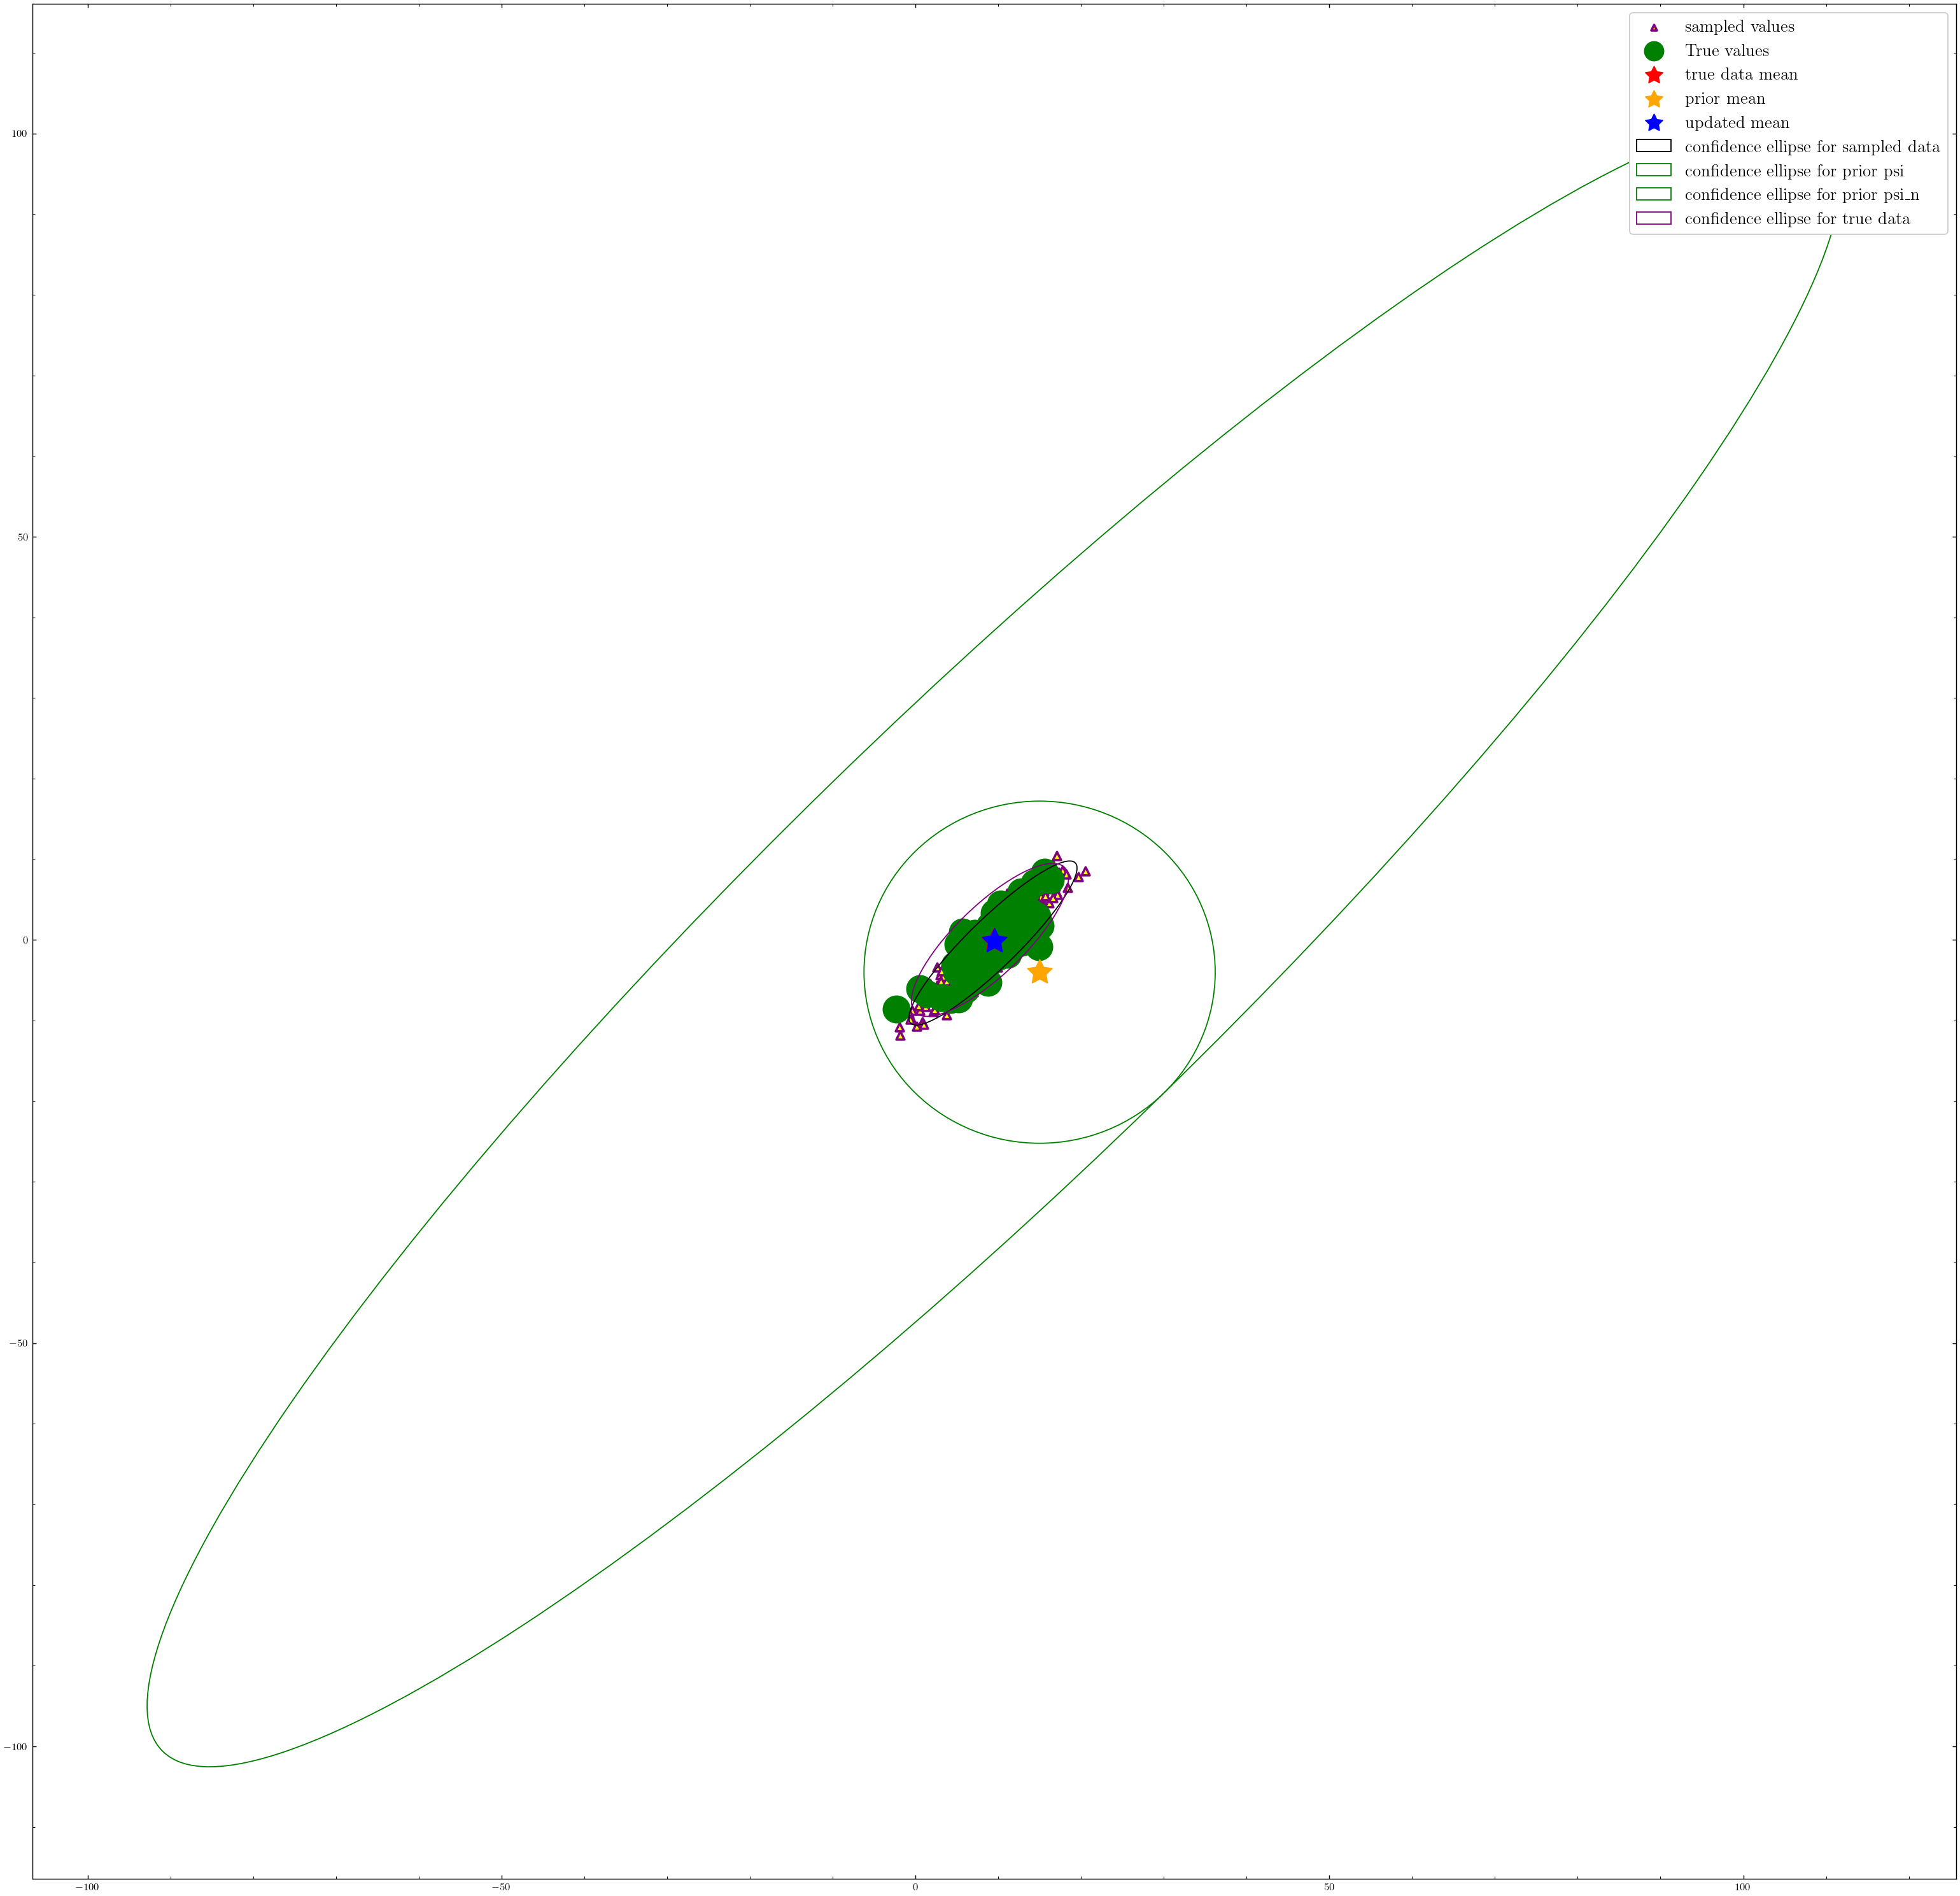

In [15]:
import numpy as np
import pandas as pd
from plot_helpers import *
from operator import itemgetter
from scipy.stats import invwishart
import matplotlib.pyplot as plt






## posterior function:

def params_init(data,mu_0,psi_0,kappa_0):
    mu_0 = np.array(mu_0) ## random initialization of mu_s for two distribution
    mean_data = (np.mean(data, axis = 0))
    #psi_0 = (np.eye(mu_0.shape[0])*10).T
    inv_psi_0 = np.linalg.inv(psi_0)
    dim = mu_0.shape[0]
    nu_0 = dim + 2
    n = data.shape[0]
    
    sum_square_0 = np.sum(np.square(data['X_0']-mean_data[0]))
    sum_square_1 = np.sum(np.square(data['X_1']-mean_data[1]))
    
    sum_squares = np.array([sum_square_0,sum_square_1])
    mu_n = np.array(((kappa_0 * mu_0) + (n * mean_data)) / (kappa_0 + n))
    kappa_n = kappa_0 + n
    nu_n = nu_0 + n
    psi_n = psi_0 + sum_squares + kappa_0 * n / float(kappa_0 + n) * np.array(np.matrix(mean_data - mu_0).T * np.matrix(mean_data - mu_0))
    
    params_dict = {"sum_squares":sum_squares, "mu_n":mu_n, "kappa_n": kappa_n, "nu_n": nu_n, "psi_n": psi_n}
    return(params_dict)
    
    ##sum_squares = np.sum([np.array(np.matrix(x - mu_0).T * np.matrix(x - mu_0)) for x in data], axis=0)
    
    
def model(data,mu_n,kappa_n,nu_n,psi_n):
    #psi_n =  np.array([[2000,0],[0,2000]])
    #nu_n = 6
    sigma =  invwishart.rvs(nu_n, psi_n, size=1, random_state=None)
    mu = np.random.multivariate_normal(np.array(mu_n),np.matrix(sigma/kappa_n))
    X_p = np.random.multivariate_normal(mu,sigma)
    return({'sigma':sigma, 'mu':mu, 'X_p':X_p})

def model_iter(data,mu_0,kappa_0,psi_0,iter):
    
    params_dict = params_init(data,mu_0,psi_0,kappa_0)
    sum_squares, mu_n, kappa_n, nu_n, psi_n = itemgetter('sum_squares','mu_n','kappa_n','nu_n','psi_n' )(params_dict)
    
    mu_list = []
    X_list = []
    sigma_list = []

    for i in range(iter):
        model_i = model(data,mu_n,kappa_n,nu_n,psi_n)
        sigma_i, mu_i, X_pi = itemgetter('sigma','mu','X_p')(model_i)
        
        mu_list.append(mu_i)
        X_list.append(X_pi)
        sigma_list.append(sigma_i)
        
    return({'mu_list':mu_list, 'X_list':X_list, 'sigma_list':sigma_list})



## Generate True Data

prior_mean = np.array([15,-4])

# mu_0_0, sigma_0_0 = 9,2
# mu_1_0, sigma_1_0 = 0,2

mu_0_0, mu_1_0 =  9,0


# X_0 = np.random.normal(mu_0_0, sigma_0_0,500)
# X_1 = np.random.normal(mu_1_0, sigma_1_0,500)


## working psis

## both positvely correlated
# data_psi_0 = np.array([[8, 5], [5, 8]])
# psi_0 = np.array([[50, 20], [20, 50]])


# both negatively correlated
# data_psi_0 = np.array([[8, -5], [-5, 8]])
# psi_0 = np.array([[50, -20], [-20, 50]])

## both uncorrelated
# data_psi_0 = np.array([[8, 0], [0, 8]])
# psi_0 = np.array([[50, 0], [0, 50]])

# true correlated, prior uncorrelated
data_psi_0 = np.array([[10, 8], [8, 10]])
psi_0 = np.array([[50, 0], [0, 50]])



data = pd.DataFrame(np.random.multivariate_normal([mu_0_0,mu_1_0],data_psi_0,100))

data.columns = ['X_0', 'X_1']
X_0 = data['X_0']
X_1 = data['X_1']


# cov = np.cov(X_0,X_1)
mean_params = np.array([mu_0_0,mu_1_0])

#          X_0       X_1
# 0  19.829318 -2.525469
# 1  15.536567 -0.132423
# 2   8.973754 -1.515256
# 3  15.581452  0.308409
# 4  12.837487  1.233319

## skewed data:

#X_0 = np.array([5.922797,6.219637,7.782832,7.224556,2.843914 ])
#X_1 = np.array([0.281539,-0.198847,-1.742269,0.148458,2.009761])

##guassian data

#X_0 = np.array([0.705504,0.45985,-0.259585,-0.225402,-0.080895])
#X_1 = np.array([-0.002918,-0.79659,0.153938,0.590776,-0.431625])

#psi_0 = pd.DataFrame(np.random.multivariate_normal([4,0],np.eye(2)*10,1000))

##X_0 = np.array([-0.355264,0.413329,-0.379939,-0.82394,0.852404])
##X_1 = np.array([-0.287304,0.673887,2.35026,0.693115,0.786935])

# data_dict = {"X_0":X_0, "X_1":X_1}
# data = pd.DataFrame(data_dict)

print(data)
# print(cov)
print(mean_params)
##print(prior_mean[1])
#print(psi_0.iloc[:,1])

mean_data = (np.mean(data, axis = 0))

print(*['prior data mean: (', prior_mean[0],',', prior_mean[1],')'])
print(*['true mean: (', mean_data[0],',',mean_data[1],')'])

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(X_0,X_1,alpha = 1,
            s = 100, label = 'true data points')

ax.scatter(mean_data[0],mean_data[1], marker = (5, 1), s = 500, c = 'red', label = 'true data mean')

ax.scatter(prior_mean[0],prior_mean[1], marker = (5, 1), s = 500, c = 'orange', label = 'prior mean')

#confidence_ellipse(X_0,X_1, ax, label = 'confidence ellipse for true data', edgecolor='purple' )

confidence_ellipse_mean_cov(mean_params, data_psi_0, ax, n_std=3.0, facecolor='none', edgecolor = 'purple'
                            , label = 'confidence ellipse for true data' )

#confidence_ellipse(psi_0.iloc[:,0],psi_0.iloc[:,1], ax, label = 'confidence ellipse for prior psi', edgecolor='green')

confidence_ellipse_mean_cov(prior_mean, psi_0, ax, n_std=3.0, facecolor='none', edgecolor = 'green'
                            , label = 'confidence ellipse for prior psi' )


ax.legend(framealpha=1, frameon=True, markerscale = 0.7, fontsize=15);

plt.show()


params_dict = params_init(data,prior_mean ,psi_0,1)
sum_squares, mu_n, kappa_n, nu_n, psi_n = itemgetter('sum_squares','mu_n','kappa_n','nu_n','psi_n' )(params_dict)
print(params_dict)


model_iter_i = model_iter(data,prior_mean,1,psi_0,1000)

mu_list, X_list, sigma_list = itemgetter('mu_list', 'X_list', 'sigma_list')(model_iter_i)

mu_s = pd.DataFrame(mu_list)
mu_s.columns = ['mu_0','mu_1']
X_pred = pd.DataFrame(X_list)
X_pred.columns = ['X_0','X_1']
X_pred_mean = np.mean(X_pred, axis = 0)

mu_updated = np.mean(mu_s, axis = 0)
mean_data = (np.mean(data, axis = 0))

sigma_array = np.array(sigma_list)
sigma_array_reshape = sigma_array.reshape(1000,2*2)
sigma_mean_posterior = np.reshape(np.mean(sigma_array_reshape,axis = 0), (2,2))

# print(mu_s)
# print(X_pred)
#print(sigma_list)
#print(sigma_array)
# print(sigma_array_reshape)
# #print(sigma_list)
# print(np.mean(sigma_list))
# print(sigma_array.shape)
# print(sigma_array_reshape.shape)
print(sigma_mean_posterior)
#print((cov))
#print(X_pred_mean)


print(*['prior data mean: (', prior_mean[0],',', prior_mean[1],')'])
print(*['true mean: (', mean_data[0],',',mean_data[1],')'])
print(*['posterior mean: (', mu_updated[0],',',mu_updated[1],')'])

fig, ax1 = plt.subplots(figsize=(30, 30))

ax1.scatter(X_pred['X_0'], X_pred['X_1'], c ="yellow",
            linewidths = 2, 
            marker ="^",
            edgecolor ="purple",
            s = 50, label = 'sampled values')

ax1.scatter(X_0, X_1, c ="green",
            linewidths = 2, alpha = 1,
            edgecolor ="green",
            s = 500, label = 'True values')

ax1.scatter(mean_data[0],mean_data[1], marker = (5, 1), s = 500, c = 'red', label = 'true data mean')

ax1.scatter( prior_mean[0], prior_mean[1], marker = (5, 1), s = 500, c = 'orange', label = 'prior mean')

ax1.scatter(mu_updated[0], mu_updated[1], marker = (5, 1), s = 500, c = 'blue', label = 'updated mean')

confidence_ellipse_mean_cov(X_pred_mean, sigma_mean_posterior, ax1, n_std=3.0, facecolor='none', edgecolor = 'black'
                            , label = 'confidence ellipse for sampled data' )

confidence_ellipse_mean_cov(prior_mean, psi_0, ax1, n_std=3.0, facecolor='none', edgecolor = 'green'
                            , label = 'confidence ellipse for prior psi' )

confidence_ellipse_mean_cov(mu_n, psi_n, ax1, n_std=3.0, facecolor='none', edgecolor = 'green'
                            , label = 'confidence ellipse for prior psi_n' )

confidence_ellipse_mean_cov(mean_params, data_psi_0,  ax1, n_std=3.0, facecolor='none', edgecolor = 'purple'
                            , label = 'confidence ellipse for true data' )

ax1.legend(framealpha=1, frameon=True, markerscale = 0.7, fontsize=15);

plt.show()